### Model Prediction for Social Media Engagement score

### Identifying factors contributing to social media engagement on Twitter

### 1) How you approach the dataset

##### Data with null text have been excluded

##### All model inputs can be separated into content and context engagement features

##### a) Contents Engagement features
######   text
######   is_reply
######   is_retweet
######   time
######   day
######  url
######   verified

##### b) Context Engagement features
######   hashtag_count
######   reply_count
######   like_count
######   quote_count
######   follower_count
######   sentiment_score
######   emotion_score

###### Retweet_count is considered as Engagement score (target label)
###### All models input and label except 'sentiment score' and 'emotion score' were normalized to bring on same scale
###### Correlation calculation for Target label vs model input
###### Correlation Visual Presentation for all model inputs


### 2) EDA performed
###### Exploratory Data Analysis about distribution of model input features and target variable in the dataset
###### EDA insights covered in detail in seperate notebook


### 3) Different Models built
###### Following regression model have been evaluated:-
###### Simple Linear Regression
###### Multi Layer Perceptron
###### Random Forest Regressor

### 4) Parameters you optimized and your final model
###### Hyper parameter tuning done for selected Random Forest Regressor for accuracy score

### 5) Final recommendations with respect to the model
###### Model prediction have been evaluated and calculated for Random forest regressor based on accuracy score 
###### Model has generalize with 83% accuracy score
###### Test accuracy score have evaluated with Train score
###### Final prediction results have evaluated with Actual score

### Importing Python modules

In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import   accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

### Importing Data

In [50]:
df = pd.read_csv("D:/IIT Delhi/Project_work/tanishq_final2.csv",encoding='latin-1')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231339 entries, 0 to 231338
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               231339 non-null  int64  
 1   text             218978 non-null  object 
 2   hashtag_count    231339 non-null  int64  
 3   is_reply         231339 non-null  int64  
 4   is_retweet       231339 non-null  int64  
 5   time             231339 non-null  int64  
 6   day              231339 non-null  int64  
 7   url              231339 non-null  int64  
 8   retweet_count    231339 non-null  int64  
 9   reply_count      231339 non-null  int64  
 10  like_count       231339 non-null  int64  
 11  quote_count      231339 non-null  int64  
 12  follower_count   231339 non-null  int64  
 13  verified         231339 non-null  int64  
 14  sentiment_score  231339 non-null  float64
 15  emotion_score    231339 non-null  float64
dtypes: float64(2), int64(13), object(1)
me

### Excluding null values

In [52]:
df = df.dropna(axis=0, subset=['text'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218978 entries, 0 to 231338
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               218978 non-null  int64  
 1   text             218978 non-null  object 
 2   hashtag_count    218978 non-null  int64  
 3   is_reply         218978 non-null  int64  
 4   is_retweet       218978 non-null  int64  
 5   time             218978 non-null  int64  
 6   day              218978 non-null  int64  
 7   url              218978 non-null  int64  
 8   retweet_count    218978 non-null  int64  
 9   reply_count      218978 non-null  int64  
 10  like_count       218978 non-null  int64  
 11  quote_count      218978 non-null  int64  
 12  follower_count   218978 non-null  int64  
 13  verified         218978 non-null  int64  
 14  sentiment_score  218978 non-null  float64
 15  emotion_score    218978 non-null  float64
dtypes: float64(2), int64(13), object(1)
me

In [23]:
df.head(2)

,id,text,hashtag_count,is_reply,is_retweet,time,day,url,retweet_count,reply_count,like_count,quote_count,follower_count,verified,sentiment_score,emotion_score
0,0,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,34,0,0.3182,0.3182
1,1,please ... do not buy from.. they are working ...,3,0,1,23,2,0,806,0,0,0,230,0,0.3182,0.3182


### Normalizing data with Minmax scaler

In [53]:
scaler = MinMaxScaler()
df[['hashtag_count', 'reply_count','like_count','quote_count','follower_count','retweet_count']] = scaler.fit_transform(df[['hashtag_count', 'reply_count','like_count','quote_count','follower_count','retweet_count']])

In [455]:
# exporting the dataframe
df.to_csv('D:/IIT Delhi/Project_work/tanishq_final2_scaled.csv')

In [16]:
df.head(5)

,id,text,hashtag_count,is_reply,is_retweet,time,day,url,retweet_count,reply_count,like_count,quote_count,follower_count,verified,sentiment_score,emotion_score
0,0,please ... do not buy from.. they are working ...,0.115385,0,1,23,2,0,0.127290,0.0,0.0,0.0,0.000002,0,0.3182,0.3182
1,1,please ... do not buy from.. they are working ...,0.115385,0,1,23,2,0,0.127290,0.0,0.0,0.0,0.000015,0,0.3182,0.3182
2,2,had an opportunity to express my views on the ...,0.038462,0,1,23,2,0,0.340809,0.0,0.0,0.0,0.000007,0,0.5859,0.5859
3,3,please ... do not buy from.. they are working ...,0.115385,0,1,23,2,0,0.127290,0.0,0.0,0.0,0.000242,0,0.3182,0.3182
4,4,please ... do not buy from.. they are working ...,0.115385,0,1,23,2,0,0.127290,0.0,0.0,0.0,0.000016,0,0.3182,0.3182


In [387]:
#df['engagement_score'] = df['reply_count'] + df['like_count'] + df['quote_count']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218978 entries, 0 to 231338
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               218978 non-null  int64  
 1   text             218978 non-null  object 
 2   hashtag_count    218978 non-null  float64
 3   is_reply         218978 non-null  int64  
 4   is_retweet       218978 non-null  int64  
 5   time             218978 non-null  int64  
 6   day              218978 non-null  int64  
 7   url              218978 non-null  int64  
 8   retweet_count    218978 non-null  float64
 9   reply_count      218978 non-null  float64
 10  like_count       218978 non-null  float64
 11  quote_count      218978 non-null  float64
 12  follower_count   218978 non-null  float64
 13  verified         218978 non-null  int64  
 14  sentiment_score  218978 non-null  float64
 15  emotion_score    218978 non-null  float64
dtypes: float64(8), int64(7), object(1)
mem

In [373]:
#import pandas as pd
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[['follower_count1', 'hashtag_count1']] = scaler.fit_transform(df[['follower_count', 'hashtag_count']])

### Identifying corelation between input and output variables

In [29]:
df_corr = df.corr()

In [30]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["retweet_count"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target> 0.00]
relevant_features

id                 0.123576
hashtag_count      0.022196
is_reply           0.133943
is_retweet         0.263340
time               0.043389
day                0.035933
url                0.175966
retweet_count      1.000000
reply_count        0.002509
like_count         0.001187
quote_count        0.000543
follower_count     0.019270
verified           0.037048
sentiment_score    0.111450
emotion_score      0.275238
Name: retweet_count, dtype: float64

### Correlation Quotient for all variables

In [31]:
df.corr().style.background_gradient()

,id,hashtag_count,is_reply,is_retweet,time,day,url,retweet_count,reply_count,like_count,quote_count,follower_count,verified,sentiment_score,emotion_score
id,1.000000,-0.032996,0.035110,-0.030797,-0.378608,-0.502474,-0.054437,0.123576,0.002408,0.002732,0.002093,-0.012876,-0.016640,-0.070248,0.139000
hashtag_count,-0.032996,1.000000,0.120048,-0.309884,0.000963,0.010680,0.204597,-0.022196,0.008681,0.009551,0.007029,0.009038,0.026724,0.034741,0.004195
is_reply,0.035110,0.120048,1.000000,-0.506115,-0.030166,-0.010640,-0.002645,-0.133943,0.002490,0.001812,0.001184,-0.004976,-0.004857,0.013777,0.039244
is_retweet,-0.030797,-0.309884,-0.506115,1.000000,0.026008,0.008440,-0.251188,0.263340,-0.048394,-0.061158,-0.043521,-0.051312,-0.094649,-0.024337,-0.061092
time,-0.378608,0.000963,-0.030166,0.026008,1.000000,-0.056658,-0.044092,-0.043389,-0.001892,-0.001731,-0.000053,0.008477,0.003705,-0.015688,-0.026695
day,-0.502474,0.010680,-0.010640,0.008440,-0.056658,1.000000,0.071989,-0.035933,-0.001598,-0.001081,-0.002104,0.011894,0.013832,0.074807,-0.072276
url,-0.054437,0.204597,-0.002645,-0.251188,-0.044092,0.071989,1.000000,-0.175966,0.024634,0.023222,0.023812,0.039337,0.063746,0.026519,-0.131316
retweet_count,0.123576,-0.022196,-0.133943,0.263340,-0.043389,-0.035933,-0.175966,1.000000,-0.002509,0.001187,-0.000543,-0.019270,-0.037048,0.111450,0.275238
reply_count,0.002408,0.008681,0.002490,-0.048394,-0.001892,-0.001598,0.024634,-0.002509,1.000000,0.662847,0.808680,0.161442,0.100600,-0.003547,0.004819
like_count,0.002732,0.009551,0.001812,-0.061158,-0.001731,-0.001081,0.023222,0.001187,0.662847,1.000000,0.677719,0.076179,0.106926,-0.004792,0.004156


### Random Forest Regressor Model Building

#### Model Prediction

#### Hyper parameter tuning

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(['text','id','sentiment_score','retweet_count'], axis=1)
y = df['retweet_count']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,
                                                   random_state=42)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175182 entries, 201629 to 127549
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   hashtag_count   175182 non-null  float64
 1   is_reply        175182 non-null  int64  
 2   is_retweet      175182 non-null  int64  
 3   time            175182 non-null  int64  
 4   day             175182 non-null  int64  
 5   url             175182 non-null  int64  
 6   reply_count     175182 non-null  float64
 7   like_count      175182 non-null  float64
 8   quote_count     175182 non-null  float64
 9   follower_count  175182 non-null  float64
 10  verified        175182 non-null  int64  
 11  emotion_score   175182 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 17.4 MB


In [19]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 175182 entries, 201629 to 127549
Series name: retweet_count
Non-Null Count   Dtype  
--------------   -----  
175182 non-null  float64
dtypes: float64(1)
memory usage: 2.7 MB


####  Tuning Iteration 2

In [64]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m, ret_scores=False):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    if ret_scores: return res

### Predicting accuracy score

In [65]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, min_samples_leaf=1,max_features='auto', verbose=0,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.05278370450897378, 0.08765367061731681, 0.9390089344202641, 0.8372328964515712, 0.8257344131061496]


In [66]:
scores = print_score(m, ret_scores=True)

[0.05278370450897378, 0.08765367061731681, 0.9390089344202641, 0.8372328964515712, 0.8257344131061496]


In [67]:
y_test_pred = m.predict(X_test)

In [68]:
y_train_pred = m.predict(X_train)

In [69]:
print('training_loss') 
scores[0]

training_loss


0.05278370450897378

In [70]:
print('test_loss')
scores[1]

test_loss


0.08765367061731681

In [71]:
print('train_r2') 
scores[2]

train_r2


0.9390089344202641

In [72]:
print('test_r2') 
scores[3]

test_r2


0.8372328964515712

In [73]:
prediction = m.predict(X_test)
print('MAE: ' + str(mean_absolute_error(y_test, prediction)))
print('MSE: ' + str(mean_squared_error(y_test, prediction)))
print('Score: '+ str(r2_score(y_test, prediction)))

MAE: 0.043224781652093064
MSE: 0.0076831659726890045
Score: 0.8372328964515712


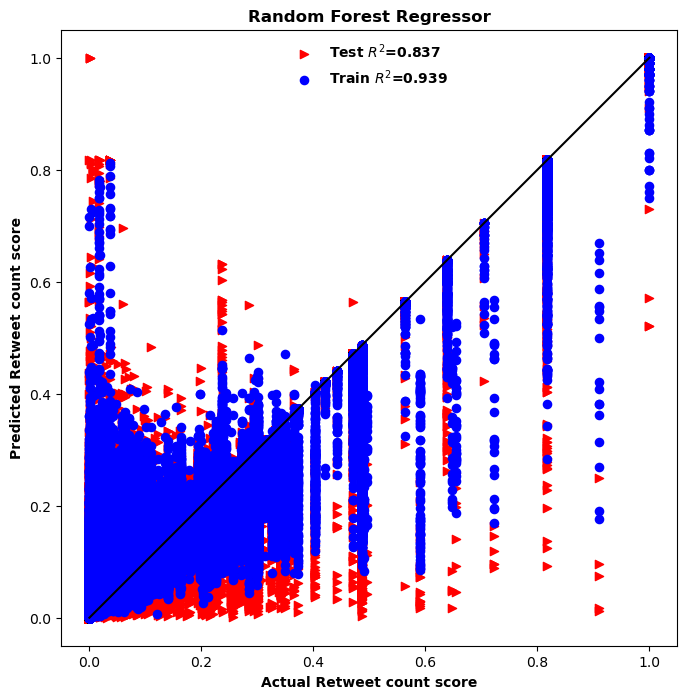

In [75]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],color='black')
plt.scatter(y_test,y_test_pred , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_test_pred),alpha=1)
plt.scatter(y_train, y_train_pred,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_train_pred),alpha=1 )

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Actual Retweet count score',fontweight='bold')
plt.ylabel('Predicted Retweet count score',fontweight='bold')
plt.title('Random Forest Regressor',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

#### Tuning Iteration 2 

In [55]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m, ret_scores=False):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    if ret_scores: return res

In [56]:
m1 = RandomForestRegressor(max_depth =15,n_estimators=100, n_jobs=-1, min_samples_leaf=1,max_features='auto', verbose=0,oob_score=True)
m1.fit(X_train, y_train)
print_score(m1)

[0.07796272822315288, 0.08036697229975485, 0.8669421370719375, 0.8631699030053177, 0.8554975994191951]


In [57]:
scores = print_score(m1, ret_scores=True)

[0.07796272822315288, 0.08036697229975485, 0.8669421370719375, 0.8631699030053177, 0.8554975994191951]


In [58]:
y_test_pred_m1 = m1.predict(X_test)

In [59]:
y_train_pred_m1 = m1.predict(X_train)

In [60]:
print('train_r2') 
scores[2]

train_r2


0.8669421370719375

In [61]:
print('test_r2') 
scores[3]

test_r2


0.8631699030053177

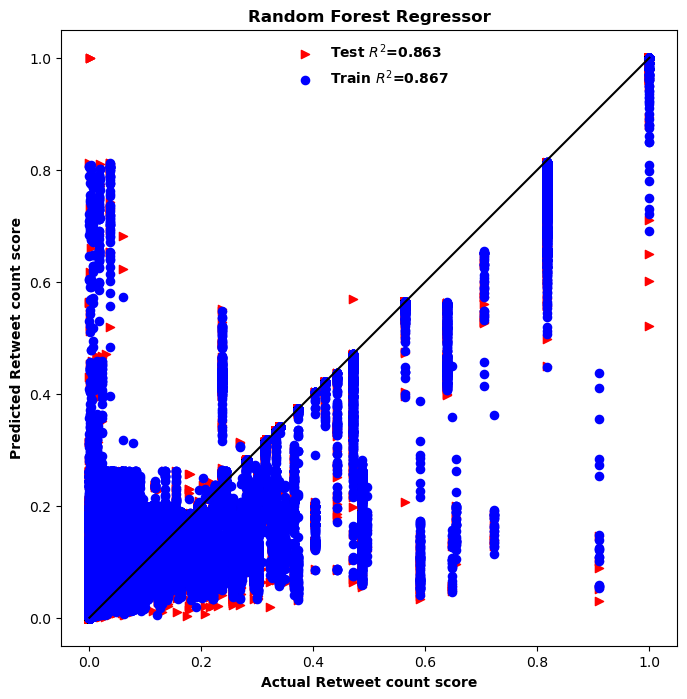

In [63]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],color='black')
plt.scatter(y_test,y_test_pred_m1 , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_test_pred_m1),alpha=1)
plt.scatter(y_train, y_train_pred_m1,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_train_pred_m1),alpha=1 )

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Actual Retweet count score',fontweight='bold')
plt.ylabel('Predicted Retweet count score',fontweight='bold')
plt.title('Random Forest Regressor',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

### Final chosen score

#### R square accuracy score on Train dataset is 93%
#### R square accuracy score on Test dataset is 83%

### Identifying input feature importance

                importance
feature                   
emotion_score        0.648
hashtag_count        0.094
follower_count       0.088
is_retweet           0.054
day                  0.045
url                  0.037
time                 0.033
is_reply             0.000
reply_count          0.000
like_count           0.000
quote_count          0.000
verified             0.000


<AxesSubplot:xlabel='feature'>

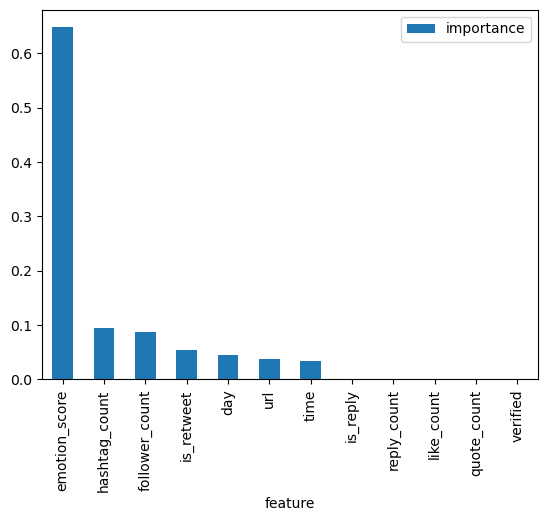

In [49]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(m.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

#### 'Emotion_score' carries hightest significance followed by 'hashtag_count' & 'follower_count'


### Predicting retweet_count_score on test dataset

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43796 entries, 155416 to 157632
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hashtag_count   43796 non-null  float64
 1   is_reply        43796 non-null  int64  
 2   is_retweet      43796 non-null  int64  
 3   time            43796 non-null  int64  
 4   day             43796 non-null  int64  
 5   url             43796 non-null  int64  
 6   reply_count     43796 non-null  float64
 7   like_count      43796 non-null  float64
 8   quote_count     43796 non-null  float64
 9   follower_count  43796 non-null  float64
 10  verified        43796 non-null  int64  
 11  emotion_score   43796 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 4.3 MB


In [44]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 43796 entries, 155416 to 157632
Series name: retweet_count
Non-Null Count  Dtype  
--------------  -----  
43796 non-null  float64
dtypes: float64(1)
memory usage: 684.3 KB


In [59]:
print(len(prediction))
print(len(y_test))
print(prediction[0:6])

43796
43796
[0.06411876 0.21336071 0.24040232 0.25602337 0.06597599 0.09444093]


### Visualization and Creating Prediction output

In [51]:
from sklearn.model_selection import train_test_split

X_data = df
y_data = df

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data,y_data, test_size=.20,
                                                   random_state=42)

In [65]:
y_test_pred = m.predict(X_test)
print(y_test_pred[0:6])

[0.06411876 0.21336071 0.24040232 0.25602337 0.06597599 0.09444093]


In [ ]:
y_pred = pd.DataFrame(y_test_pred,columns=['retweet_count_pred'])

In [103]:
y_pred.to_csv('D:/IIT Delhi/Project_work/prediction_result.csv')

In [104]:
X_test_data.to_csv('D:/IIT Delhi/Project_work/test_data.csv')

In [105]:
final_result = pd.read_csv("D:/IIT Delhi/Project_work/Final_results.csv",encoding='latin-1')

### Visualization of Actual vs Predicted Retweet count

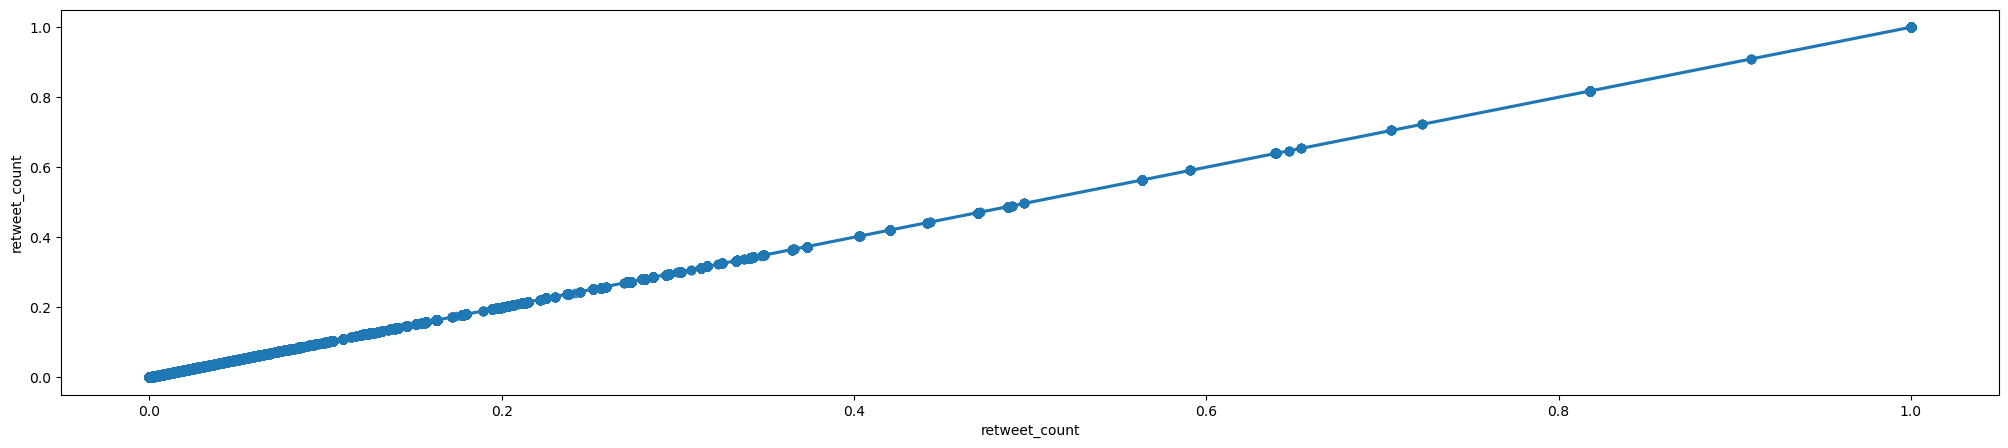

In [138]:
fig = plt.figure(figsize=(25,5))
sns.regplot(x = final_result['retweet_count'], y = final_result['retweet_count'], data = final_result)
plt.show()

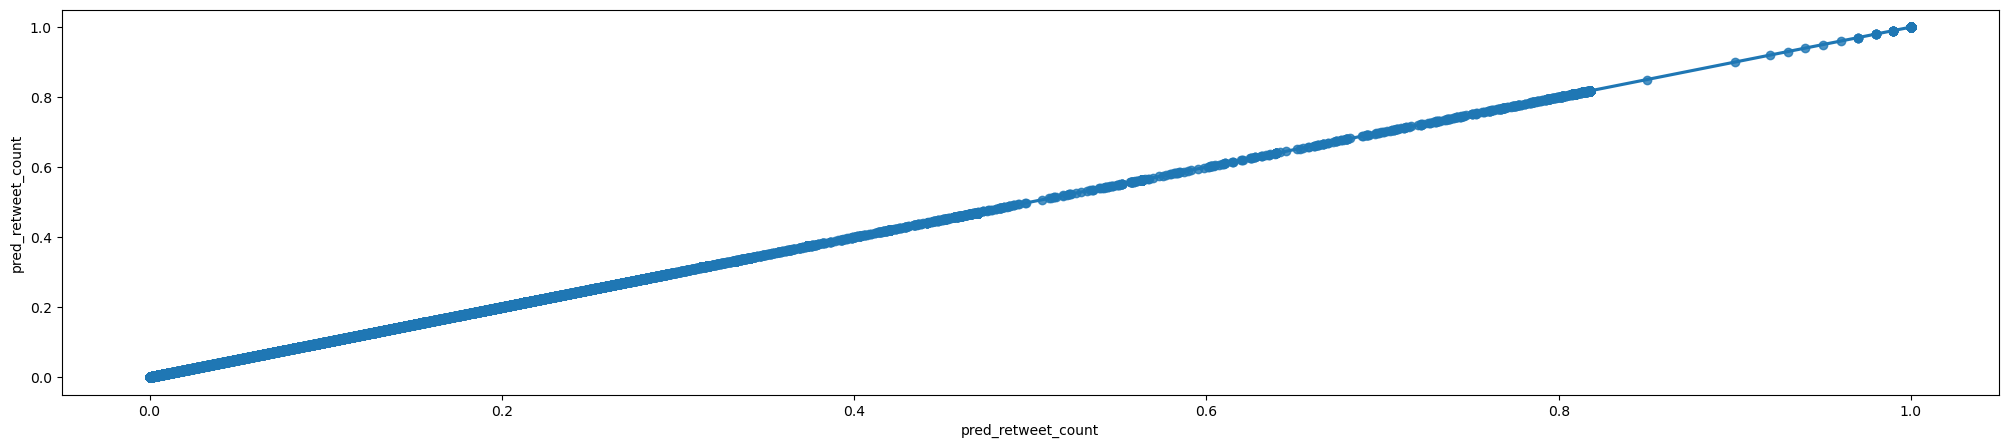

In [139]:
fig = plt.figure(figsize=(25,5))
sns.regplot(x = final_result['pred_retweet_count'], y = final_result['pred_retweet_count'], data = final_result)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted')

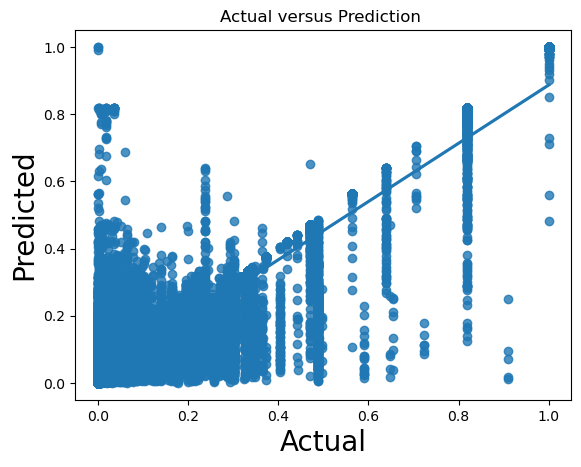

In [133]:
sns.regplot(y_test,prediction)
plt.title('Actual versus Prediction')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)  

## Other Models Used

### Simple Linear Regression Prediction

In [7]:
from sklearn.linear_model import LinearRegression

linReg2 = LinearRegression() #  importing LinearRegression
linReg2.fit(X_train,y_train) #  fitting the train data frame and train feature to the LinearRegression
predict_linReg2 = linReg2.predict(X_test)
predict_linReg2_train = linReg2.predict(X_train)

In [8]:
print('MAE: ' + str(mean_absolute_error(y_test, predict_linReg2)))
print('MSE: ' + str(mean_squared_error(y_test, predict_linReg2)))
print('Test Score: '+ str(r2_score(y_test, predict_linReg2)))

MAE: 0.14397677815920443
MSE: 0.03906699542785748
Test Score: 0.17236960483015962


(-0.05, 1.217820030323772, -0.21019184712723712, 1.057628183196535)

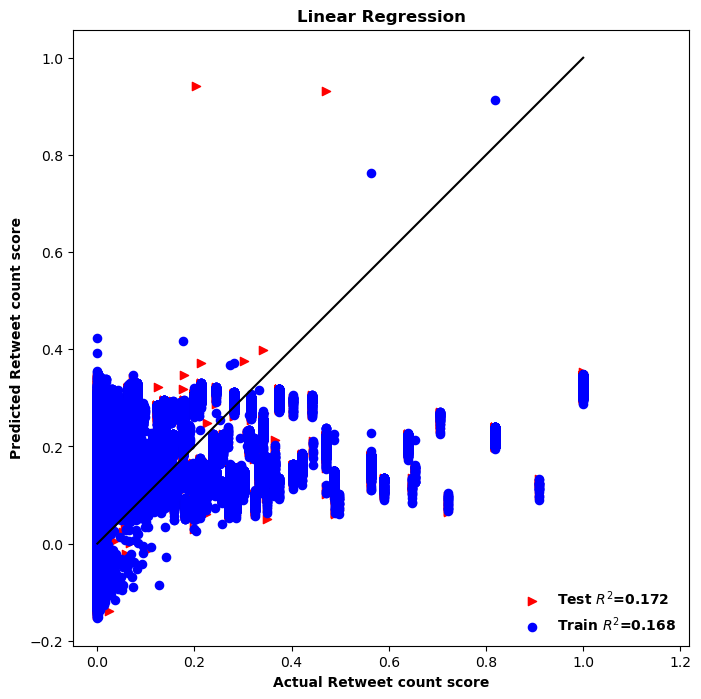

In [9]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],color='black')
plt.scatter(y_test,predict_linReg2 , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,predict_linReg2),alpha=1)
plt.scatter(y_train, predict_linReg2_train,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,predict_linReg2_train),alpha=1 )

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Actual Retweet count score',fontweight='bold')
plt.ylabel('Predicted Retweet count score',fontweight='bold')
plt.title('Linear Regression',fontweight='bold')
plt.axis('square')

### Multi layer perceptron Prediction

In [177]:
model_mlp = MLPRegressor(hidden_layer_sizes=[20,20],activation='relu',alpha=1.0,
                   learning_rate ='constant', max_iter=10000,random_state=42)
#Model is trained on training dataset
model_mlp.fit(X_train,y_train)

MLPRegressor(alpha=1.0, hidden_layer_sizes=[20, 20], max_iter=10000,
             random_state=42)

In [179]:
y_predtest_mlp = model_mlp.predict(X_test)
y_predtrain_mlp = model_mlp.predict(X_train)

In [180]:
print('MAE: ' + str(mean_absolute_error(y_test, y_predtest_mlp)))
print('MSE: ' + str(mean_squared_error(y_test, y_predtest_mlp)))
print('Score: '+ str(r2_score(y_test, y_predtest_mlp)))

MAE: 0.146919815024774
MSE: 0.04035762577317132
Score: 0.14502772990448753


(-0.05, 1.0662466024877582, -0.06550812055649641, 1.0507384819312617)

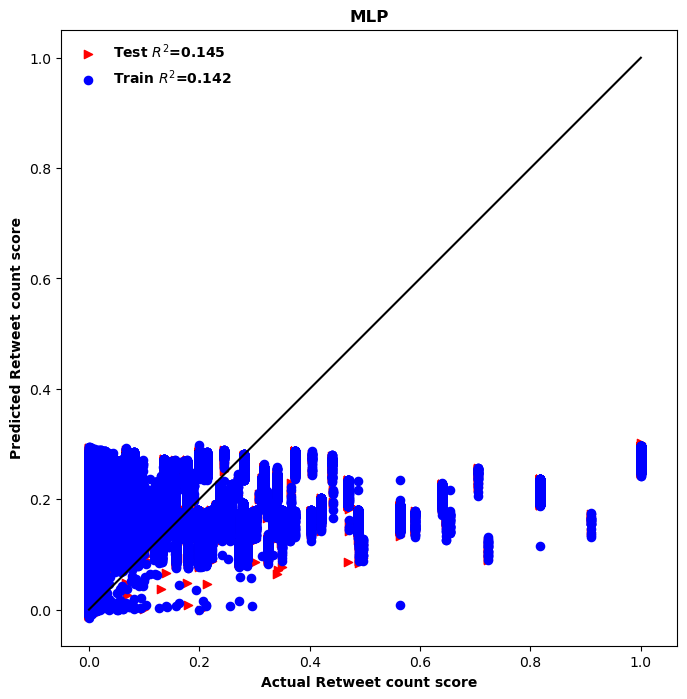

In [190]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],color='black')
plt.scatter(y_test,y_predtest_mlp , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest_mlp),alpha=1)
plt.scatter(y_train, y_predtrain_mlp,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain_mlp),alpha=1 )

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Actual Retweet count score',fontweight='bold')
plt.ylabel('Predicted Retweet count score',fontweight='bold')
plt.title('MLP',fontweight='bold')
plt.axis('square')